<a href="https://colab.research.google.com/github/dookda/cmu_py499/blob/main/building/YOLO9_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

!mkdir dataset
!unzip /content/drive/MyDrive/_DATASET/building_dataset/building.zip -d /content/dataset/

!pip install ultralytics

install labelme

`pip install labelme

`pip install pandas ultralytics numpy matplotlib seaborn pytest-warnings PyYAML random Pillow opencv-python`

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [11]:
dataDir = os.path.join(os.getcwd(), 'dataset')
print(dataDir)

/Users/sakdahomhuan/Dev/cmu_py499/building/dataset


/Users/sakdahomhuan/Dev/cmu_py499/building/dataset/train/images
['000000000211_png.rf.54f2f8c8501ae87bcf66e82eb5ede5bb.jpg', '000000005278_png.rf.a6897fc6f6755a8efb478a921593f91c.jpg', '000000000809_png.rf.2be0c70109cbbeb36ba0d5a73b8b60c2.jpg', '000000000807_png.rf.ad9b51e4cbf570e5a1f36de10eb265bb.jpg', '000000000935_png.rf.01bd205d0ada1572bc8644e080cddeb8.jpg', '000000000950_png.rf.6948183acac3d42366b5a763e7375394.jpg', '000000000210_png.rf.46e026b9311479b25b5e6ec20ef50c41.jpg', '000000000213_png.rf.13cf0624953577ed3d10e482b5df709d.jpg', '000000005260_png.rf.8c2a4f5ab46698661e942873421ff87f.jpg', '000000000798_png.rf.e49ee380baef5ee2b87eb20fbfa86b76.jpg', '000000000941_png.rf.deac7d673dd6a20a6e54bd68baead02c.jpg', '000000000208_png.rf.cf8b0821482111974da7520e4bb57d36.jpg', '000000000086_png.rf.d6059fcde0d44c16efef35bdabe29f4f.jpg', '000000000804_png.rf.328a267dae708f19212153f8fa6a01e6.jpg', '000000000082_png.rf.a016a7be958c36a4d9750a41d36d9e6e.jpg', '000000000810_png.rf.146505ae072c76

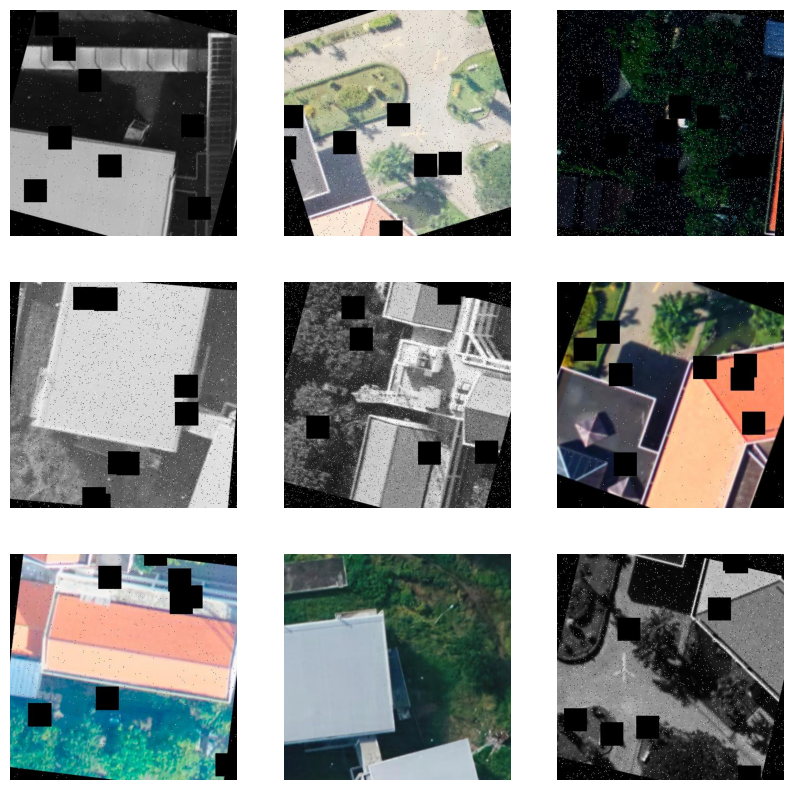

In [12]:
trainImagePath = os.path.join(dataDir, 'train', 'images')
print(trainImagePath)
imageFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.jpg')]
print(imageFiles)
randomImages = random.sample(imageFiles, 9)

plt.figure(figsize=(10,10))

for i, image_file in enumerate(randomImages):
  image_path = os.path.join(trainImagePath, image_file)
  image = Image.open(image_path)
  plt.subplot(3, 3, i + 1)
  plt.imshow(image)
  plt.axis('off')


In [13]:
model = YOLO('yolov8n-seg.pt')
# model = YOLO('yolov9c-seg.pt')

In [14]:
model.info()

YOLOv8n-seg summary: 261 layers, 3409968 parameters, 0 gradients, 12.8 GFLOPs


(261, 3409968, 0, 12.772710400000001)

In [15]:
yamlFilePath = os.path.join(dataDir, 'data.yaml')
print(yamlFilePath)

/Users/sakdahomhuan/Dev/cmu_py499/building/dataset/data.yaml


In [21]:
results = model.train(
    data=yamlFilePath,
    epochs=100,
    imgsz=640,
    batch=16,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.01,
    dropout=0.25,
    device='mps', #'mps', 'cpu' or '0,1,2,3',
    seed=42,
    project=os.getcwd(), 
    name='model' 
)

New https://pypi.org/project/ultralytics/8.2.45 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'name=model' automatically updated to 'name=yolov8n-seg'.
Ultralytics YOLOv8.2.6 🚀 Python-3.12.3 torch-2.3.0 MPS (Apple M2)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/Users/sakdahomhuan/Dev/cmu_py499/building/dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=/Users/sakdahomhuan/Dev/cmu_py499/building, name=yolov8n-seg2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stre

train: Scanning /Users/sakdahomhuan/Dev/cmu_py499/building/dataset/train/labels.cache... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]
val: Scanning /Users/sakdahomhuan/Dev/cmu_py499/building/dataset/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

Plotting labels to /Users/sakdahomhuan/Dev/cmu_py499/building/yolov8n-seg2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/sakdahomhuan/Dev/cmu_py499/building/yolov8n-seg2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.352       4.63      3.044      1.593        135        640:  29%|██▊       | 4/14 [06:15<15:38, 93.84s/it]


KeyboardInterrupt: 

In [19]:
bestModelPath = os.path.join(os.getcwd(), 'best_building_079.pt')  
print(bestModelPath)
bestModel = YOLO(bestModelPath)

bestModel.info()

/Users/sakdahomhuan/Dev/cmu_py499/building/best_building_079.pt
YOLOv8n-seg summary: 261 layers, 3264006 parameters, 0 gradients


(261, 3264006, 0, 0.0)

AttributeError: 'Segment' object has no attribute 'detect'

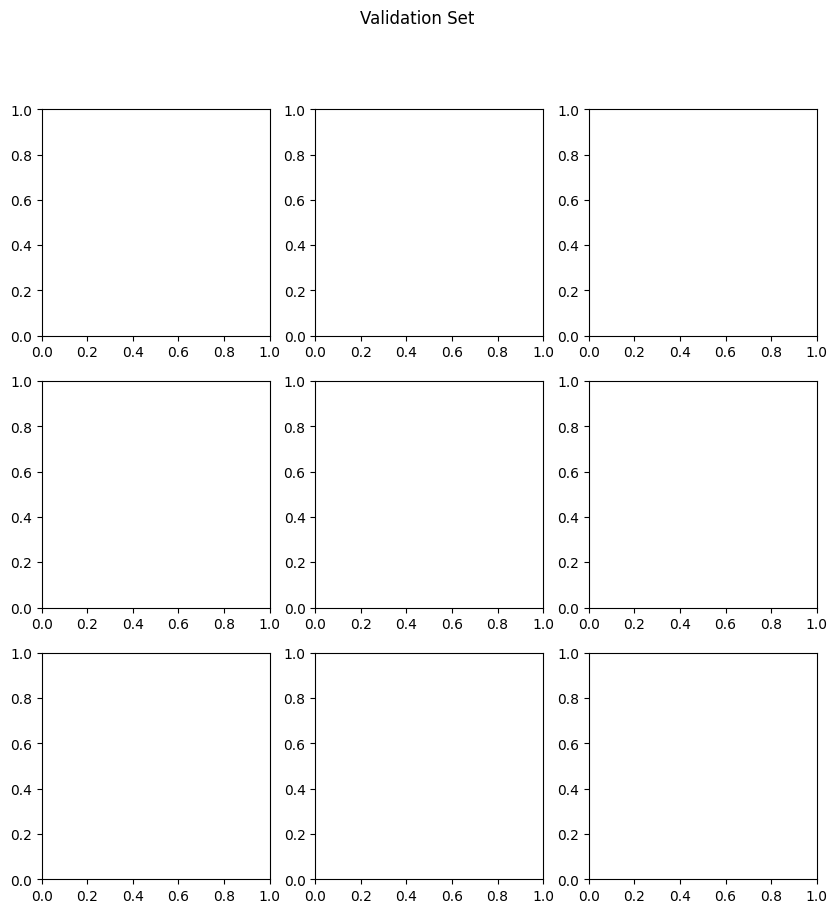

In [20]:
validImagePath = os.path.join(dataDir, 'test', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = bestModel.predict(source=imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()